# Linear Regression

In [110]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model 
from sklearn.model_selection import train_test_split # Train / Test splitting
from matplotlib import pyplot as plt # Python plotting lib
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.metrics import mean_squared_error, r2_score # Metrics for evaluating the models
from sklearn.preprocessing import PolynomialFeatures # Polynomial Features for Linear Regression
from sklearn.linear_model import Ridge # Ridge Regressor

In [2]:
doctor_training_data = pd.read_excel('./data/doctors_fees_training_data.xlsx') # import xlsx file

In [3]:
doctor_training_data.tail() #check data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [4]:
#dummy_place = pd.get_dummies(doctor_training_data.Place) #1 hot encoding
#dummy_qualification = pd.get_dummies(doctor_training_data.Qualification) #1 hot encoding
#dummy_profile = pd.get_dummies(doctor_training_data.Profile) #1 hot encoding

doctor_training_data['Place'] = pd.factorize(doctor_training_data['Place'])[0]
doctor_training_data['Qualification'] = pd.factorize(doctor_training_data['Qualification'])[0]
doctor_training_data['Profile'] = pd.factorize(doctor_training_data['Profile'])[0]

In [5]:
#merged = pd.concat([doctor_training_data, dummy_place, dummy_qualification, dummy_profile], axis="columns") #merge new columns
final = doctor_training_data

In [6]:
#final = merged.drop(['Qualification', 'Place', 'Miscellaneous_Info', 'Profile'], axis="columns") #drop old our new columns

In [7]:
#Drop 1 dummy column of each 1hotencoded to avoid the dummy trap
#final = final.drop(['Old City, Hyderabad', 'BSc - Zoology, BAMS', 'ENT Specialist'], axis="columns")

In [8]:
experience = final['Experience'].apply(lambda x: int(x.split('years experience')[0])) # Parse out the number from the experience

In [9]:
final = final.drop(['Experience'], axis="columns") #drop experience column
final = pd.concat([final, experience], axis="columns") #concat our parsed experience column


In [10]:
final = final.dropna() #Drop NaN rows - these will probably cause the model to throw an error

In [11]:
rating = final['Rating'].apply(lambda x: x.split('%')[0]) #process the rating column to remove the %

In [12]:
final = final.drop('Rating', axis="columns") #drop rating column

In [13]:
final = pd.concat([final, rating], axis="columns") #concat our parsed rating column

In [14]:
final = final.drop('Miscellaneous_Info', axis="columns") #drop this feedback column - hard to process it
final = final.sort_values(by=['Experience'])

In [15]:
final

,Qualification,Place,Profile,Fees,Experience,Rating
2091,151,114,5,250,0,95
2773,53,99,3,100,0,96
4012,53,165,3,500,0,96
3344,327,275,4,100,0,81
2744,6,280,3,200,2,100
...,...,...,...,...,...,...
3942,160,476,2,100,51,88
5422,1309,671,2,550,52,58
1860,15,563,2,100,53,93
4212,16,103,4,200,56,76


In [16]:
model = LinearRegression() #Linear Regression model

In [17]:
#x = final.drop('Fees', axis="columns") #drop Fees - this is the column we will be predicting
x = final['Experience'].values.reshape(-1,1)

In [18]:
y = final['Fees'].values.reshape(-1,1) #column we will be predicting

In [ ]:
polynomial_features = PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)

In [19]:
model.fit(x, y)
#model.fit(x_poly, y)
#y_poly_pred = model.predict(x_poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [31]:
doctor_test_data = pd.read_excel('./data/doctors_fees_test_data.xlsx') # import xlsx file

In [32]:
# need to process test data similar to train data so we can predict
#dummy_test_place = pd.get_dummies(doctor_test_data.Place) #1 hot encoding
#dummy_test_qualification = pd.get_dummies(doctor_test_data.Qualification) #1 hot encoding
#dummy_test_profile = pd.get_dummies(doctor_test_data.Profile) #1 hot encoding

doctor_test_data['Place'] = pd.factorize(doctor_test_data['Place'])[0]
doctor_test_data['Qualification'] = pd.factorize(doctor_test_data['Qualification'])[0]
doctor_test_data['Profile'] = pd.factorize(doctor_test_data['Profile'])[0]
final_test = doctor_test_data

In [33]:
#merged_test = pd.concat([doctor_test_data, dummy_test_place, dummy_test_qualification, dummy_test_profile], axis="columns") #merge new columns
#final_test = merged_test.drop(['Qualification', 'Place', 'Miscellaneous_Info', 'Profile'], axis="columns") #drop old our new columns

In [34]:
experience_test = final_test['Experience'].apply(lambda x: int(x.split('years experience')[0])) # Parse out the number from the experience
final_test = final_test.drop(['Experience'], axis="columns") #drop experience column
final_test = pd.concat([final_test, experience_test], axis="columns") #concat our parsed experience column

In [35]:
final_test = final_test.dropna()

In [36]:
final_test = final_test.drop(['Miscellaneous_Info'], axis="columns")

In [37]:
rating_test = final_test['Rating'].apply(lambda x: x.split('%')[0]) #process the rating column to remove the %
final_test = final_test.drop('Rating', axis="columns") #drop rating column
final_test = pd.concat([final_test, rating_test], axis="columns") #concat our parsed rating column

In [38]:
# try to predict the final_test Fees
test_x = final_test['Experience'].values.reshape(-1,1)
test_y = model.predict(test_x)

In [ ]:
model.score(test_x, test_y)

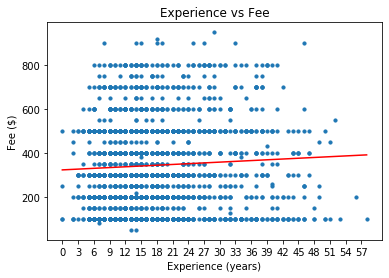

In [21]:
#train_x = np.array(x['Experience'])
#train_y = np.array(y)
#predicted_y = np.array(test_y)


plt.scatter(x, y, s=10)
plt.plot(x, model.predict(x), color="red")
plt.title('Experience vs Fee')
plt.xlabel('Experience (years)')
plt.xticks(np.arange(0, 60, 3))
plt.ylabel('Fee ($)')
plt.show()

In [23]:
test_set_rmse = (np.sqrt(mean_squared_error(y, model.predict(x)))) #RMSE
test_set_r2 = r2_score(y, model.predict(x)) #R2

In [24]:
test_set_rmse

192.32571852773435

In [25]:
test_set_r2

0.0032896382758600407

# Regression Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
tree = DecisionTreeRegressor(criterion='mae', max_depth=3, presort=True, max_features=5)

In [100]:
final_features = final.drop(['Fees'], axis="columns")
tree.fit(final_features,y)

DecisionTreeRegressor(criterion='mae', max_depth=3, max_features=5,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=True, random_state=None, splitter='best')

In [101]:
predict_y = tree.predict(final_test)

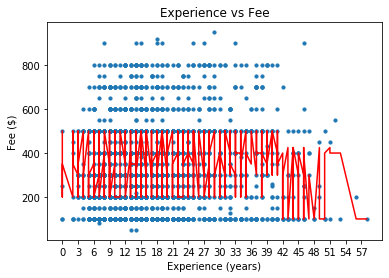

In [105]:
plt.scatter(final_features['Experience'],y, s=10)
plt.plot(final_features['Experience'], tree.predict(final_features), color="red")
plt.title('Experience vs Fee')
plt.xlabel('Experience (years)')
plt.xticks(np.arange(0, 60, 3))
plt.ylabel('Fee ($)')
plt.show()

In [106]:
test_set_rmse = (np.sqrt(mean_squared_error(y, tree.predict(final_features)))) #RMSE
test_set_r2 = r2_score(y, tree.predict(final_features)) #R2

In [107]:
test_set_rmse

183.86150855123677

In [108]:
test_set_r2

0.08908913099136051

In [109]:
tree.score(final_features, y)

0.08908913099136051

# Ridge Regression

In [123]:
ridge = Ridge(alpha=1, normalize=True, solver='auto')


In [124]:
ridge.fit(final_features, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [125]:
predict_y = ridge.predict(final_test)

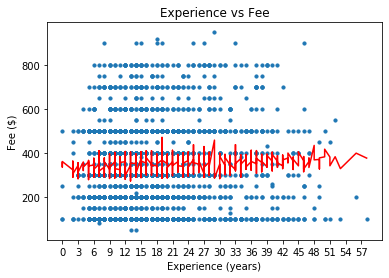

In [126]:
plt.scatter(final_features['Experience'],y, s=10)
plt.plot(final_features['Experience'], ridge.predict(final_features), color="red")
plt.title('Experience vs Fee')
plt.xlabel('Experience (years)')
plt.xticks(np.arange(0, 60, 3))
plt.ylabel('Fee ($)')
plt.show()

In [127]:
test_set_rmse = (np.sqrt(mean_squared_error(y, tree.predict(final_features)))) #RMSE
test_set_r2 = r2_score(y, tree.predict(final_features)) #R2


In [128]:
test_set_rmse


183.86150855123677

In [129]:
test_set_r2

0.08908913099136051

In [130]:
ridge.score(final_features, y)

0.037044570325324044